In [1]:
'''
【课程1.3】  对比分析

对比分析 → 两个互相联系的指标进行比较

绝对数比较（相减） / 相对数比较（相除）
结构分析、比例分析、空间比较分析、动态对比分析

'''

'\n【课程1.3】  对比分析\n\n对比分析 → 两个互相联系的指标进行比较\n\n绝对数比较（相减） / 相对数比较（相除）\n结构分析、比例分析、空间比较分析、动态对比分析\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

                A_sale      B_sale
2019-06-01  413.836563  386.062930
2019-06-02  285.542215  247.213650
2019-06-03  528.259177  434.256102
2019-06-04  841.596932  754.902016
2019-06-05  284.627545   51.209441


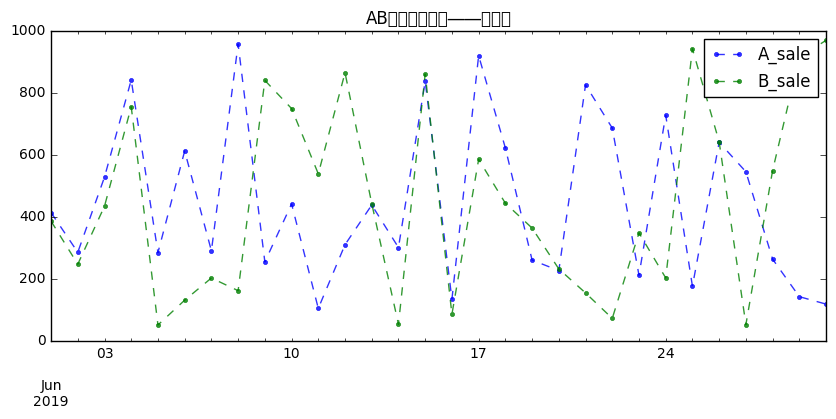

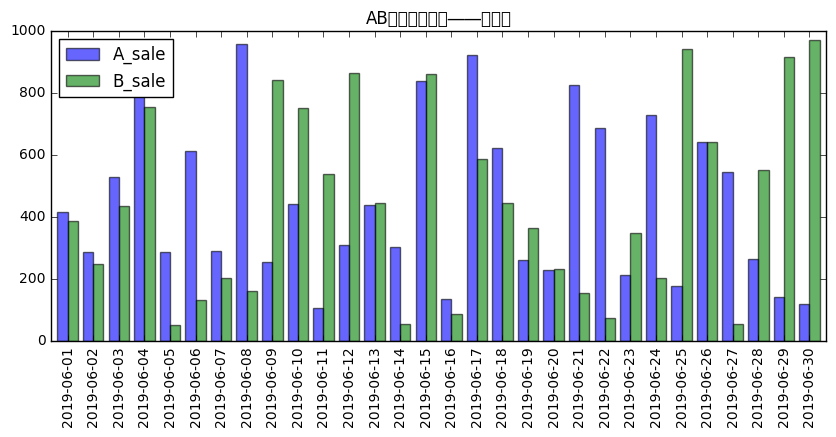

In [10]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较

data = pd.DataFrame(np.random.rand(30,2)*1000,columns = ['A_sale','B_sale'],index = pd.period_range('20190601','20190630'))
print(data.head())

data.plot(kind = 'line',
         style = '--.',
         alpha = 0.8,
         figsize = (10,4),
         title = 'AB产品销量对比——折线图')

data.plot(kind = 'bar',
         width = 0.8,
         alpha = 0.6,
         figsize = (10,4),
         title = 'AB产品销量对比——直方图')

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


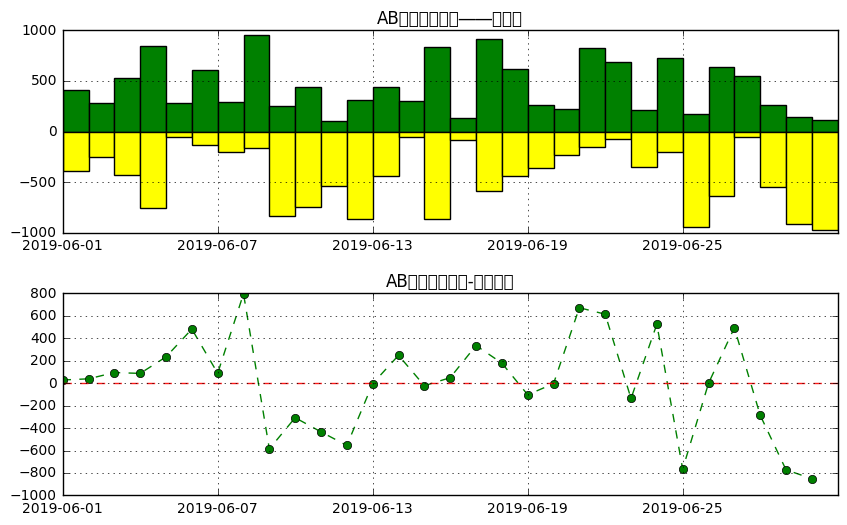

In [24]:
# 1、绝对数比较 → 相减
# （3）柱状图堆叠图+差值折线图比较

fig3 = plt.figure(figsize = (10,6))
plt.subplots_adjust(hspace=0.3)
# 创建子图及间隔设置

ax1 = fig3.add_subplot(2,1,1)
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x,y1,width = 1,facecolor = 'green')
plt.bar(x,y2,width = 1,facecolor = 'yellow')
plt.title('AB产品销量对比——堆叠图')
plt.grid()
plt.legend()
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])

ax2 = fig3.add_subplot(2,1,2)
y3 = data['A_sale'] - data['B_sale']
plt.plot(x,y3,'--go')
plt.axhline(0,hold = None,color = 'red',linestyle = '--',alpha = 0.9)  #  添加y轴参考线
plt.grid()
plt.title('AB产品销量对比-差值折线')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])
# 创建差值折线图


                 A_sale      B_sale
2019-06-01  2632.695651   36.008269
2019-06-02  2998.632202  160.174667
2019-06-03  8224.480809  138.802127
2019-06-04  9932.632292  188.500126
2019-06-05  9515.930848  154.697173


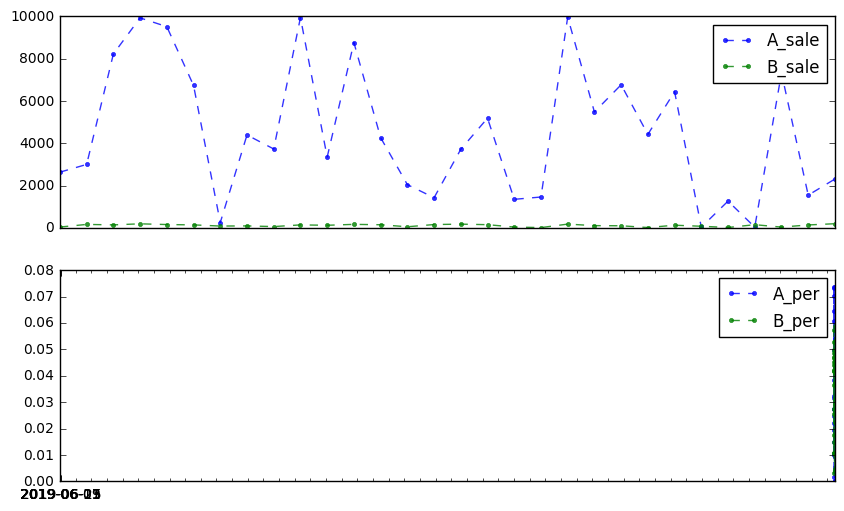

In [39]:
# 2、相对数比较 → 相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析
# （1）结构分析
# 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构

data = pd.DataFrame({'A_sale':np.random.rand(30)*10000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20190601','20190630'))
print(data.head())
data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()
data['A_per%'] = data['A_per'].apply(lambda x: "%2f%%" % (x*100))
data['B_per%'] = data['B_per'].apply(lambda x: '%2f%%' % (x*100))
fig,axes = plt.subplots(2,1,figsize = (10,6),sharex= True)
data[['A_sale','B_sale']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[0])
axes[0].legend(loc = 'upper right')
data[['A_per','B_per']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[1])
axes[1].legend(loc = 'upper right')
plt.xticks(range(0,30,6))
axes[1].set_xticklabels(data.index[::6])
# 绝对值对比较难看出结构性变化，通过看销售额占比来看售卖情况的对比

# 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
# 例如：国内生产总值“元/人”，人口密度“人/平方公里”

         consumption       salary
2019-01  2619.696090  5229.226143
2019-02  2282.184095  5085.474014
2019-03  2632.570138  5152.991413
2019-04  2578.919148  5323.731758
2019-05  2449.287280  5094.248187
         consumption       salary       c_s
2019-01  2619.696090  5229.226143  0.500972
2019-02  2282.184095  5085.474014  0.448765
2019-03  2632.570138  5152.991413  0.510882
2019-04  2578.919148  5323.731758  0.484419
2019-05  2449.287280  5094.248187  0.480795


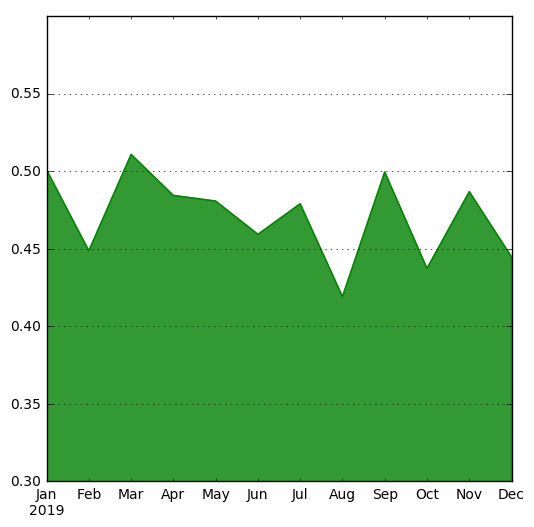

In [48]:
# 2、相对数比较 → 相除
# （2）比例分析
# 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”
# 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

data = pd.DataFrame({'consumption':np.random.rand(12)*1000+2000,
                    'salary':np.random.rand(12)*500+5000},
                   index = pd.period_range('201901','201912',freq='M'))
print(data.head())
data['c_s'] = data['consumption'] / data['salary']
print(data.head())
data['c_s'].plot.area(color = 'g',alpha = 0.8,ylim = [0.3,0.6],figsize = (6,6),grid = True)

In [1]:
# 2、相对数比较 → 相除
# （3）空间比较分析（横向对比分析）
# 同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
# 空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值
# 一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事

data = pd.DataFrame({'A':np.random.rand(12)*500,
                    'B':np.random.rand(12)*400,
                    'C':np.random.rand(12)*450,
                    'D':np.random.rand(12)*600},
                   index = pd.period_range('201901','201912',freq="M"))
print(data.head())
data.sum().plot(kind = 'bar',color = ['r','b','g','k'],alpha = 0.8,grid = True)
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+200,'%.2f' % j, color = 'k')

data[:5].plot(kind = 'bar',color = ['r','b','g','k'],alpha = 0.8,grid = True)

# 多系列柱状图，横向比较前十天4个产品的销售额

# 关于同比与环比
# 同比 → 产品A在2015.3和2016.3的比较（相邻时间段的同一时间点）
# 环比 → 产品A在2015.3和2015.4的比较（相邻时间段的比较）
# 如何界定“相邻时间段”与“时间点”，决定了是同比还是环比

NameError: name 'pd' is not defined

                      A
2017-01-01  1385.217467
2017-01-02  2649.981502
2017-01-03  2683.798922
2017-01-04  1901.585976
2017-01-05  1988.914587
                      A  base     l_growth     z_growth    lspeed       zspeed
2017-01-01  1385.217467  1000   385.217467     0.000000  0.385217          NaN
2017-01-02  2649.981502  1000  1649.981502  1264.764035  1.649982  -120.453432
2017-01-03  2683.798922  1000  1683.798922    33.817420  1.683799 -2616.164082
2017-01-04  1901.585976  1000   901.585976  -782.212946  0.901586 -3466.011867
2017-01-05  1988.914587  1000   988.914587    87.328612  0.988915 -1814.257364


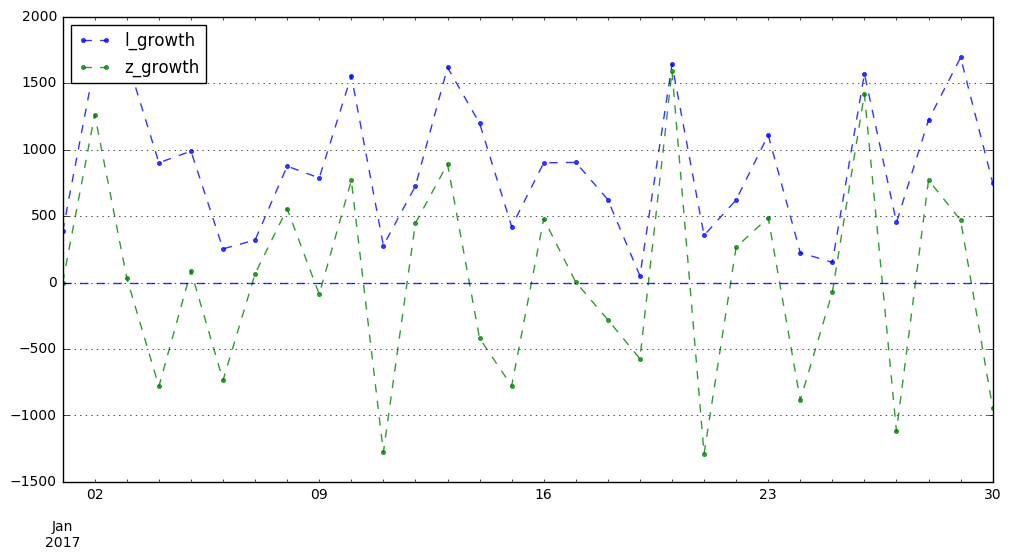

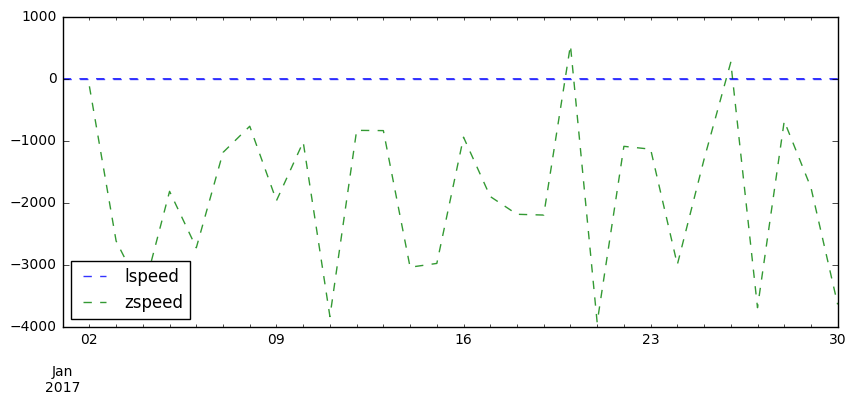

In [19]:
# 2、相对数比较 → 相除
# （4）动态对比分析（纵向对比分析）
# 同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势
# 最基本方法，计算动态相对数 → 发展速度
# 动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值
# 基期：用来比较的基础时期
# 报告期：所要研究的时期，又称计算期

data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},
                   index = pd.period_range('20170101','20170130'))
print(data.head())
data['base'] = 1000
data['l_growth'] = data['A'] - data['base']  # 累计增长量= 报告期水平- 固定期水平
data['z_growth'] = data['A'] - data.shift(1)['A']  #逐期增长量 = 报告期水平 - 报告期前一水平
data[data.isnull()] = 0
data[['l_growth','z_growth']].plot(style = '--.',grid = True,alpha = 0.8,figsize= (12,6))

plt.axhline(0,hold = None,linestyle = '--',alpha= 0.8)
plt.legend(loc = 'upper left')

data['lspeed'] = data['l_growth'] /1000
data['zspeed'] = data['z_growth'] / data.shift(1)['A']
data[['lspeed','zspeed']].plot(figsize = (10,4),alpha = 0.8,style = '--')
plt.axhline(0,hold = None,alpha = 0.7,linestyle = '--')
print(data.head())